In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Architecture of Regression Model

(1) Input Layer Shape----------Same Shape as number of features(e.g 3 for bedrooms, bathrooms, car spacing in housing price prediction)

(2) Hidden Layers----------Problem Specific, minimum=1, maximum=unlimited

(3) Neurons per hidden layer----------Problem Specific, generally 10 to 100

(4) Output layers shape----------Same shape as desired prediction shape(e.g 1 for house price)

(5) Hidden Activation----------Usually ReLU(Rectified Linear Unit)

(6) Output Activation----------None, ReLU, logistic,tanh

(7) Loss function----------MSE(Mean Square Error) or MAE(mean absolute error)/Huber(combination of MAE/MSE) if outliers

(8) Optimizer----------SGD(stochastic gradient descent), Adam


# Introduction to Regression in Nueral Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: redirecting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
print(tf.__version__)

2.15.0


# Creating data to view and fit

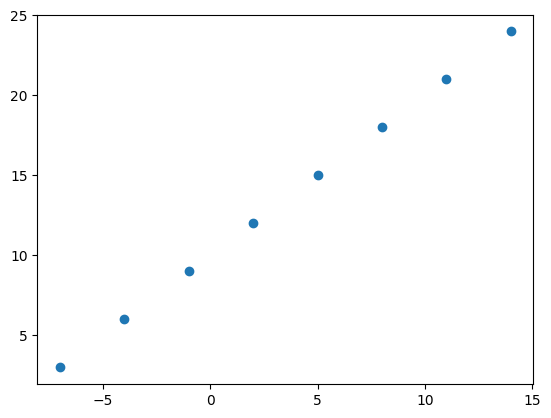

In [3]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y)

In [4]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
input_shape_0 = X[0].shape
output_shape_0 = Y[0].shape
input_shape_0, output_shape_0    # The shape becomes zero because it is scalar.

((), ())

In [8]:
X[0].ndim

0

In [9]:
# Turn our Numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X.shape, Y.shape

(TensorShape([8]), TensorShape([8]))

In [10]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

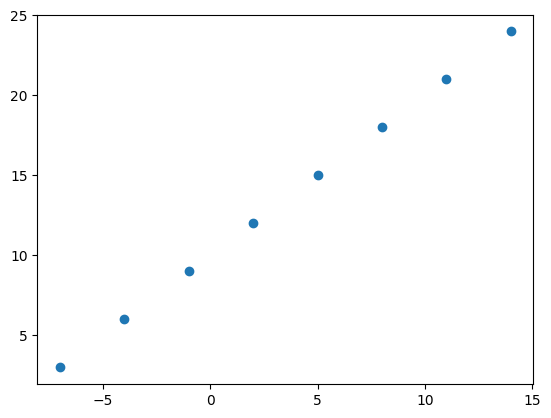

In [11]:
plt.scatter(X, Y)

# Steps in Modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model** - letting the model try to find patterns between x & Y(features and labels).


In [12]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using sequential API

model = tf.keras.Sequential([  # Sequential groups a linear stack of layers into Model
    tf.keras.layers.Dense(1)  # Dense usually refers to single layer
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,  # Loss function is used to optimize our model.
    optimizer=tf.keras.optimizers.SGD(), # We can also write optimizer='sgd'. Optimizer means how model should update its internal petterns to better its predictions.
    metrics=["mae"]  # A metric is a function that is used to judge the performance of your model.
    ) # mae is short for mean absolute error
    # SGD is short for stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5) #Epochs is total number of iterations of all the training data in one cycle for training the machine learning model.

Epoch 1/5
1/1 [==============================] - 1s 779ms/step - loss: 12.7362 - mae: 12.7362
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 12.6037 - mae: 12.6037
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 12.4712 - mae: 12.4712
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 12.3387 - mae: 12.3387
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.2062 - mae: 12.2062


In [13]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Try and make a prediction using our model

y_predict = model.predict([17.0])


1/1 [==============================] - 0s 141ms/step


#Improving our model
We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - Here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [15]:
# Let's rebuild our model

# 1. Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Learning rate is most important hyper paramteres for any neural networks.
    # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    metrics='mae'
)

# 3. Fit model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.8728 - mae: 12.8728
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.9798 - mae: 11.9798
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 11.0717 - mae: 11.0717
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1351 - mae: 10.1351
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 9.1548 - mae: 9.1548
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1165 - mae: 8.1165
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3334 - mae: 7.3334
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 7.8120 - mae: 7.8120
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2858 - mae: 8.2858
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3691 - mae: 8.3691
Epoch 11/100
1/1 [==============================] - 0s 14ms/ste

In [16]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
model.predict([17.])

1/1 [==============================] - 0s 127ms/step


array([[25.337042]], dtype=float32)

#Evaluating a model

**In practice, a typical workflow you'll go through when building neural networks is:**

Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> evaluate it...

**When it comes to evaluation... there are 3 words you should memorize**
"Visualize, visualize, visualize"

**What to visualize:**
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the prediction of a model line up against ground truth (the original labels)?

In [18]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for dataset

Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

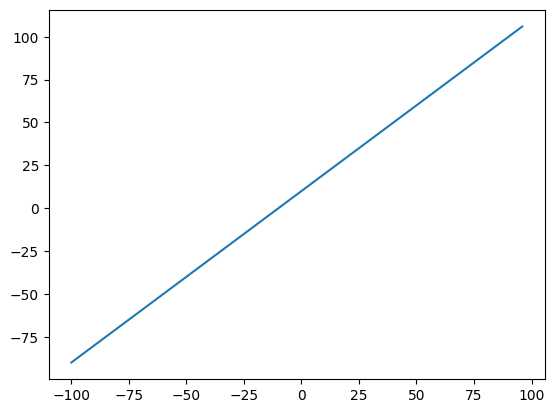

In [20]:
plt.plot(X, Y)

#The 3 sets
* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data you have available.
* **Test set** - the model gets evaluated in this data to test what is learned, this set is typically 10-15% of the total data you have available.

In [21]:
# Check the length of how many samples we have

len(X)

50

In [22]:
# Split the data into train and test

X_train = X[:40]
Y_train = Y[:40]


X_test = X[40:]
Y_test = Y[40:]

#Visualizing the data
Now we have got our data in training and test sets... let's visualize it.

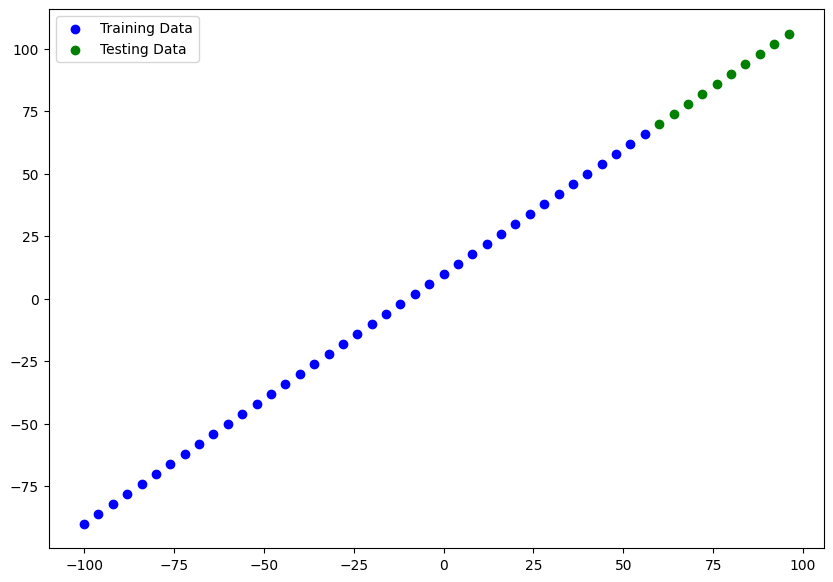

In [23]:
plt.figure(figsize=(10, 7))

# Plot training data in blue

plt.scatter(X_train, Y_train, c="b", label="Training Data") # our model will learn on this

# Plot testing data in green

plt.scatter(X_test, Y_test, c="g", label="Testing Data") # want our model to be able to predict this(given X, what's Y)

# Show Legend
plt.legend();

In [24]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics="mae"
)

# 3. Fit the model

# model.fit(tf.expnad_dims(X_train, axis=-1), Y, epochs=100)

In [25]:
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])  # input_shape=[1] means one input and one output
])

# Compile a model (same as above)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [28]:
# Let's fit the model

model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose=0) # verbose=1 shows the 100 epochs output verbose=0 doesn't

In [39]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# Create a model (same as above)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1]),  # input_shape=[1] means one input and one output
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model One")

# Compile a model (same as above)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)

In [40]:
model.summary()

Model: "Model One"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 4         
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


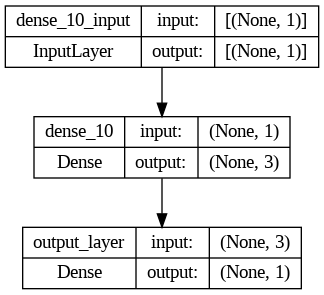

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

#Visualizing our model's prediction


In [45]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input_layer"),
    tf.keras.layers.Dense(10, name="output_layer")
], name="Hello_World")


model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics='mae'
)


model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100, verbose=0)

In [47]:
model.summary()

Model: "Hello_World"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 10)                20        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


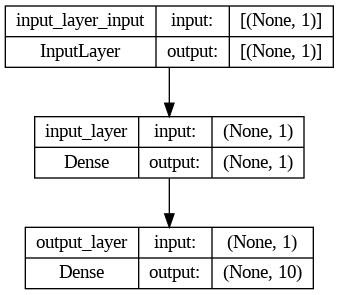

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)